In [243]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
MODE = 'voltage'  #efield/voltage
SOURCE_DIR = r"C:\Users\griffin.kowash\Documents\Projects\Cable_braids\models\Otin15-5_body_h47\25um\dexp1"  #Glenair_100-002A1000_k95_surface_median\100um\HighFreqSines"

resampled = False

if resampled:
    #EFIELD_NAME = 'Field_Probe_resampled.dat'
    CURRENT0_NAME = 'Wire_Current_resampled.dat'
    CURRENT1_NAME = 'Bulk_Current_resampled.dat'
    VWIRE_NAME = 'Wire_Voltage_resampled.dat'
    VREF_NAME = None
    
else:
    #EFIELD_NAME = 'Field_Probe.dat.dat'
    IWIRE_NAME = 'Wire_Current.dat'
    IBULK_NAME = 'Bulk_Current.dat'
    VWIRE_NAME = 'Wire_Voltage.dat'
    VREF_NAME = None
    
dx = 0.0352
freq = 1e3
cutoff = None
plotstyle = 'line'  # line or points
measurement = r"C:\Users\griffin.kowash\Documents\Projects\Cable_braids\measurements\Otin15-5.dat"  #None
mode = 'Otin15 5'

In [494]:
if MODE == 'voltage':
    #efield_data = np.loadtxt(SOURCE_DIR + '\\' + EFIELD_NAME)
    ibulk_data = np.loadtxt(SOURCE_DIR + '\\' + IBULK_NAME)
    vwire_data = np.loadtxt(SOURCE_DIR + '\\' + VWIRE_NAME)
    #et, ex, ey, ez = efield_data.T
    vt, v = vwire_data.T
    
    if IWIRE_NAME != None:
        iwire_data = np.loadtxt(SOURCE_DIR + '\\' + IWIRE_NAME)
        iwiret, iwire = iwire_data.T
        ibulkt, ibulk = ibulk_data.T
        i = ibulk - iwire
        it = iwiret
    else:
        it, i = ibulk_data.T
    
    if VREF_NAME != None:
        vref_data = np.loadtxt(SOURCE_DIR + '\\' + VREF_NAME)
        vreft, vref = vref_data.T
        v = v - vref
        
    if cutoff != None:
        argi = np.argmin(np.abs(it - cutoff))
        argv = np.argmin(np.abs(vt - cutoff))
        it, i = it[:argi], i[:argi]
        vt, v = vt[:argv], v[:argv]
        
    
    #if MODE == 'center':
    #    v1_data = np.loadtxt(SOURCE_DIR + '\\' + V1_NAME)
    #    vt_start, v_start = v0_data.T
    #    vt_end, v_end = v1_data.T
    #    
    #    vt = vt_start
    #    v = v_end - v_start


    #e = np.sqrt(ex**2 + ey**2 + ez**2)
    
elif MODE == 'efield':
    efield_data = np.loadtxt(SOURCE_DIR + '\\' + EFIELD_NAME)
    ibulk_data = np.loadtxt(SOURCE_DIR + '\\' + CURRENT1_NAME)

    et, ex, ey, ez = efield_data.T
    it, i = ibulk_data.T

In [495]:
sns.set()

In [496]:
idt = np.mean(it[1:] - it[:-1])
ifreq = np.fft.rfftfreq(it.size) / idt
i_fft = np.fft.rfft(i, norm='forward') * 2
i_fft_mag = np.abs(i_fft)
i_fft_phase = np.angle(i_fft)

if MODE == 'voltage':
    vdt = np.mean(vt[1:] - vt[:-1])
    vfreq = np.fft.rfftfreq(vt.size) / vdt
    v_fft = np.fft.rfft(v, norm='forward') * 2
    v_fft_mag = np.abs(v_fft)
    v_fft_phase = np.angle(v_fft)
    
elif MODE == 'efield':
    edt = np.mean(et[1:] - et[:-1])
    efreq = np.fft.rfftfreq(et.size) / edt
    e_fft = np.abs(np.fft.rfft(ez, norm='forward')) * 2

Selected frequency:  0.0  MHz


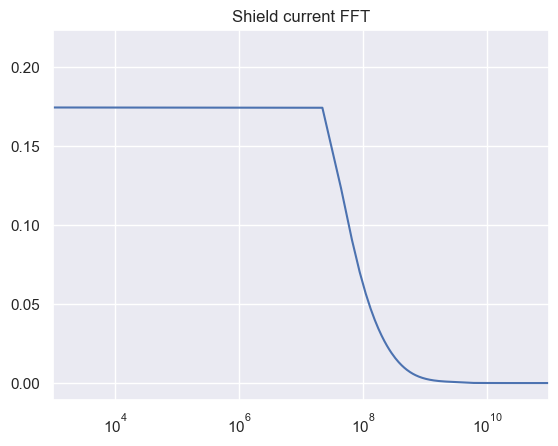

In [497]:
#plt.plot(it, i)
plt.semilogx(ifreq, i_fft_mag)
#index = np.argmax(i_fft)  #a little dodgy, but allows me to avoid specifying the frequency each time. Has worked fine so far.
index = np.argmin(np.abs(ifreq - freq))
plt.title('Shield current FFT')
plt.xlim(1e3, 1e11)
print('Selected frequency: ', round(ifreq[index] / 1e6, 3), ' MHz')

Text(0, 0.5, 'Current (A)')

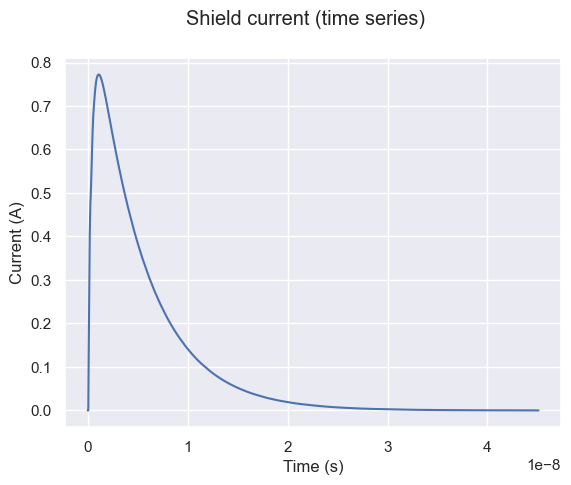

In [498]:
# Shield current time series
plt.plot(it, i)
plt.suptitle('Shield current (time series)')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

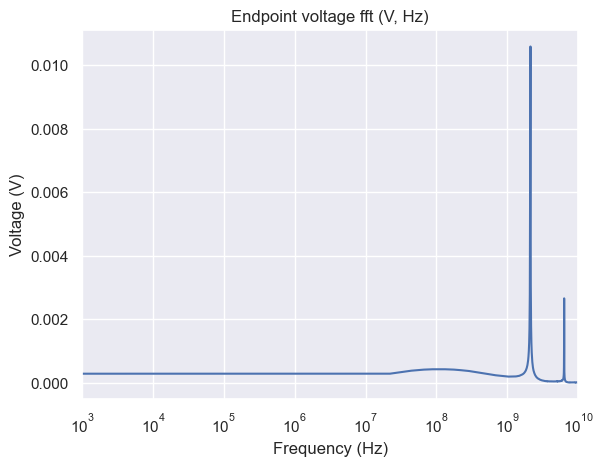

In [499]:
if MODE == 'voltage':
    plt.semilogx(vfreq, v_fft_mag)
    plt.title('Endpoint voltage fft (V, Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Voltage (V)')
    plt.xlim(1e3, 1e10)
    #plt.ylim(-1e-6, 1e-5)
    
elif MODE == 'efield':
    plt.semilogx(efreq, e_fft)
    plt.title('Electric field fft')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Electric field (V/m)')
    plt.xlim(1e3, 1e10)
    #plt.ylim(0, 1e4)

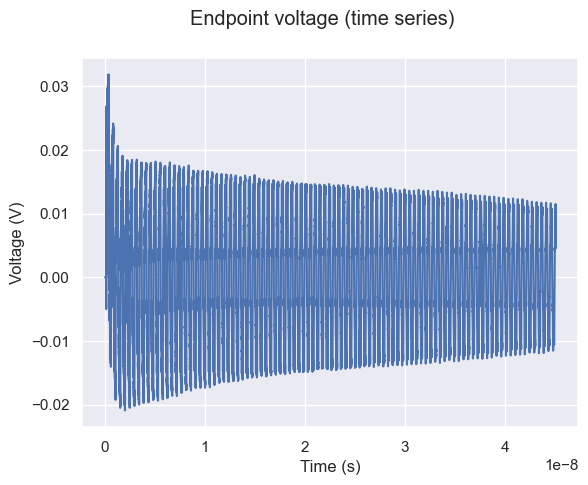

In [500]:
if MODE == 'voltage':
    plt.plot(vt, v)
    plt.suptitle('Endpoint voltage (time series)')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    
elif MODE == 'efield':
    plt.plot(et, ez)
    plt.suptitle('Electric field (time series)')
    plt.xlabel('Time (s)')
    plt.ylabel('Electric field (V/m)')

In [501]:
from scipy.special import ellipk
from scipy.special import ellipe

def calc_braid_impedance(model='Vance', freq=None, corrections=False, **kwargs): 
    u = 1.257E-6
    Dm = 2*a + 2*d # mean braid diameter
    f20=(n*d*c) / (2*np.pi*Dm*np.cos(x*(np.pi/180)))
    #f20=(n*d*c) / (4*np.pi*a*np.cos(x*(np.pi/180)))
    k20 =2*f20-f20*f20
    opt20 = 1-k20
    if x < 45:
        e20 = np.sqrt(1-(np.tan(x*(np.pi/180))**2))
        e_sq20 = (1-(np.tan(x*(np.pi/180))**2))
    else:
        e20 = np.sqrt(1 - np.arctan(x * np.pi / 180)**2)
        e_sq20 = (1 - np.arctan(x * np.pi / 180)**2)
    #z = complex(v,j)
    t20 = 9.6 * f20 *(f20**2*(2-f20)**2*d/Dm)**1.5   #check fill
    te20 = 12 * f20 *(f20**2*(2-f20)**2*d/Dm)**1.5   #check fill
    k1 =(np.pi/4)*np.power(((2/3)*f20*np.cos(x*(np.pi/180))+(np.pi/10)),-1) 
    k220 =(np.pi/4)*np.power(((2/3)*f20*np.cos(x*(np.pi/180))+(3/8)),-1) 
    w1 = ((2*np.pi*Dm)/c)*np.cos(x*(np.pi/180))-n*d #hole width
    h1 = (2*d**2)/(w1 + d) #radial spindle separation
    bigk20 = ellipk(e_sq20)
    bige20 = ellipe(e_sq20)
    
    if freq is None:
        freq = np.logspace(np.log10(1), np.log10(freq_high), 500)
    
    ######################################################
    #Vance Model
    ######################################################
    
    
    if model.lower() == "vance": #Hole Inductance
        #m20 = 0.875*((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))*np.exp(-t20)
        m20 = ((u*2*c)/(np.pi*np.cos(x*(np.pi/180))))*(w1/(np.pi*Dm))**2*np.exp(((-np.pi*d)/w1)-2)
        #m20 = ((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))
        
        if corrections:
            # hole inductance corrections from Schippers et al.
            F = n * c * d / (2 * np.pi * Dm * np.cos(x*np.pi/180))
            tau = 9.6 * F * np.cbrt(F**2 * (2 - F)**2 * d / Dm)
            m20 *= 0.875 * 0.5075 * np.exp(-tau)
        
        mt20 = m20 # This is the transfer inductance
        #print('Vance hole inductance: ', m20)
        #print('The transfer Inductance is:',mt20)
        
        dataX20 = []
        dataf = []
        rt1 = []
        zt20 = []
        zt_complex = []
        rt20v = []  # first value in this list is the transfer resistance
        Lt20v = []
        for i in freq:
            X20 = 1J*2*np.pi*i*mt20
            dataX20.append(X20)
            dataf.append(i)
            dlt = np.sqrt(2/(2*np.pi*i*u*sigma))
            if i == freq[0]:
                pass
                #print(d, n, c, sigma, x)
                #print('r0: ', 4/(np.pi*d**2*n*c*sigma*np.cos(x*(np.pi/180))))
            r20 = 4/(np.pi*d**2*n*c*sigma*np.cos(x*(np.pi/180)))*(((1+1J)*d/dlt))/np.sinh(((1+1J)*d/dlt))
            zt1 = abs(r20 + X20)
            rt20 = abs(r20)
            Lt20 = abs(X20)
            rt1.append(r20)
            zt20.append(zt1)
            zt_complex.append(r20 + X20)
            rt20v.append(rt20)
            Lt20v.append(Lt20)
            
        print('Vance inductance: ', mt20)
        
        """
        #zt_mag20 =np.sqrt(np.power(rt1,2) + np.power(dataX20,2) + np.power(ptv,2)) 
        #print('The transfer resistance is:', rt20v[0])
        title = '%s Transfer Impedance'% model 
        plt.figure(0)
        if NORMALIZE:
            plt.loglog(dataf,zt20/zt20[0], label = 'Vance Transfer Impedance (normalized)')
        else:
            plt.loglog(dataf,zt20, label = 'Vance Transfer Impedance')
        #plt.loglog(dataf,zt_mag20, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,2e10)  
        plt.ylim(1e-6,1e2)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
    
    
        title = 'Components of Transfer Impedance'
        plt.figure(1)
        plt.loglog(dataf,rt20v, label = 'Transfer Resistance')
        plt.loglog(dataf,Lt20v, label = 'Transfer Inductance')
        plt.loglog(dataf,zt20, label = 'Simulated Transfer Impedance')
        #plt.loglog(dataf,zt_magsim, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,2e10)  
        plt.ylim(1e-6,1e2)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
        """
        
        #print('DC resistance: ', rt20v[0], ' ohms')
        
        return dataf, zt_complex #zt20
    
    
        
    ######################################################
    #Tyni Model
    ######################################################
    
    
    elif model.lower() == "tyni": #Hole Inductance + Tyni Braid Inductance
        #m20 = 0.875*((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))*np.exp(-t20)
        
        m20 = ((u*2*c)/(np.pi*np.cos(x*(np.pi/180))))*(w1/(np.pi*Dm))**2*np.exp(((-np.pi*d)/w1)-2)
        mb20 = -u * (d/(4*np.pi *Dm))*(h1/d)*(1-np.tan(x*(np.pi/180))**2) # Tyni braid inductance
    
        
        #mb20 = u * (d/(4*np.pi *Dm))*(0.22/(f20*np.cos(x*(np.pi/180))))*np.cos(2*k1*x*(np.pi/180)) #Kley braid Inductance
    
        if corrections:
            #m20 *= 0.875 * 0.5075 * 0.2
            mt20 = m20 + mb20
        else:
            mt20 = m20 - mb20 # This is the transfer inductance
    
        
        dataX20 = []
        dataf = []
        rt1 = []
        zt20 = []
        zt_complex = []
        rt20v = [] # first value in this list is the transfer resistance
        Lt20v = []
        for i in freq:
            X20 = 1J*2*np.pi*i*mt20
            dataX20.append(X20)
            dataf.append(i)
            dlt = np.sqrt(2/(2*np.pi*i*u*sigma))
            r20 = 4/(np.pi*d**2*n*c*sigma*np.cos(x*(np.pi/180)))*(((1+1J)/dlt)*d)/np.sinh(((1+1J)/dlt)*d)
            zt1 = abs(r20 + X20)
            rt20 = abs(r20)
            Lt20 = abs(X20)
            rt1.append(r20)
            zt20.append(zt1)
            zt_complex.append(r20 + X20)
            rt20v.append(rt20)
            Lt20v.append(Lt20)
            
        print('Tyni inductance: ', mt20)
    
        #zt_mag20 =np.sqrt(np.power(rt1,2) + np.power(dataX20,2) + np.power(ptv,2)) 
        """
        title = '%s Transfer Impedance'% model 
        plt.figure(0)
        plt.loglog(dataf,zt20, label = 'Tyni Transfer Impedance')
        #plt.loglog(dataf,zt_mag20, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,1e8)  
        plt.ylim(1e-4,1e0)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
    
    
        title = 'Components of Transfer Impedance'
        plt.figure(1)
        plt.loglog(dataf,rt20v, label = 'Transfer Resistance')
        plt.loglog(dataf,Lt20v, label = 'Transfer Inductance')
        plt.loglog(dataf,zt20, label = 'Simulated Transfer Impedance')
        #plt.loglog(dataf,zt_magsim, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,1e8)  
        plt.ylim(1e-4,1e0)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
        """
        #print('DC resistance: ', rt20v[0], ' ohms')
        
        return dataf, zt_complex #zt20
    
    
    
    ######################################################
    #Demoulin Model
    ######################################################
    
    elif model.lower() == "demoulin": #Hole Inductance +  Tyni Braid Inductance + Porpoising 
        Dm = 2*a + 2*d
        #m20 = 0.875*((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))*np.exp(-t20)
        #m20 = ((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))
        m20 = ((u*2*c)/(np.pi*np.cos(x*(np.pi/180))))*(w1/(np.pi*Dm))**2*np.exp(((-np.pi*d)/w1)-2)
        #m20 = ((u*2*c)/(np.pi*np.cos(x*(np.pi/180))))*(w1/(np.pi*Dm))**2*np.exp(((-np.pi*d)/w1)-2)
        #m20 = ((3.1415*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))
        #m20 = 0.875*((np.pi*u)/(6*c))*np.power(opt20,1.5)*(e_sq20/(bige20-(1-e_sq20)*bigk20))*np.exp(-t20)
    
        mb20 = -u * (d/(4*np.pi *Dm))*(h1/d)*(1-np.tan(x*(np.pi/180))**2)
        #mb20 = ((u*h1)/(4*np.pi*Dm))*(1-np.tan(x*(np.pi/180))**2) # Tyni braid inductance
    
        k = -1*(1.16/(n*c*d))*np.arctan(n/3)*np.sin((np.pi/2)-(2*(x*(np.pi/180))))*(u/sigma)**(1/2) # when x<45 k is negative @ x=45 k=0
        #k = -2.461e-6
        mt20 = m20 - mb20
        #mt20 = mb20
        #mt20 = m20
        
        dataX20 = []
        dataf = []
        rt1 = []
        ztv = []
        rt20v = []  # first value in this list is the transfer resistance
        Lt20v = []
        ptv = []
        Lpv = []
        kt20v = []
        #zt_mag20 = []
        for i in freq:
            X20 = 1J*2*np.pi*i*mt20
            dataX20.append(X20)
            dataf.append(i)
            dlt = np.sqrt(2/(2*np.pi*i*u*sigma))
            r20 = 4/(np.pi*d**2*n*c*sigma*np.cos(x*(np.pi/180)))*(((1+1J)*d/dlt))/np.sinh(((1+1J)*d/dlt))
            p = k*(2*np.pi*i)**(1/2)*np.exp(1J*(np.pi/4))
            rt20 = abs(r20)
            Lt20 = abs(X20)
            pt = abs(p)
            zr = r20
            rt1.append(rt20)
            rt20v.append(rt20)
            Lt20v.append(Lt20)
            ptv.append(pt)
            zt = abs(r20 + X20 + p)
            #zt_test = np.sqrt(np.power(r20,2)+np.power(X20,2)+np.power(p,2))
            Lp = abs(X20 + p)
            Lpv.append(Lp)
            ztv.append(zt)
            kt20 = rt20 + Lp
            kt20v.append(kt20)
            #zt_mag20.append(zt_test)
            
        #zt_mag20 =np.sqrt(np.power(rt1,2) + np.power(dataX20,2) + np.power(ptv,2)) 
        slope = (ztv[-1]-ztv[0])/(dataf[-1]-dataf[0])*(1/(2*np.pi))
        #print(slope)
        
        fit = [rt20v[i] + 2*np.pi*slope*dataf[i] for i in range(0,len(dataf))]
        """
        title = '%s Transfer Impedance'% model 
        plt.figure(0)
        plt.loglog(dataf,ztv, label = 'Demoulin Transfer Impedance')
        plt.loglog(dataf,fit, label = 'fit')
        #plt.loglog(dataf,zt_mag20, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,1e8)  
        plt.ylim(1e-4,1e0)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
        
    
        title = 'Components of Transfer Impedance'
        plt.figure(1)
        plt.loglog(dataf,rt20v, label = 'Transfer Resistance')
        plt.loglog(dataf,Lpv, label = 'Transfer Inductance')
        plt.loglog(dataf,ztv, label = 'Simulated Transfer Impedance')
        #plt.loglog(dataf,zt_magsim, label = '38.6 Degrees Simulated')
        #plt.loglog(dataf,zt_sim, label = '38.6 Degrees Simulated')
        plt.title(title,fontsize=16)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Transfer Impedance (Ohm/m)")
        plt.xlim(1e4,1e8)  
        plt.ylim(1e-4,1e0)  
        plt.grid(True)
        #plt.savefig(title, dpi=200)
        """
        
        return dataf, fit
        

    elif model.lower() == 'kley':

        Dm = 2*a + 2.5*d
        G0 = c*n*d / (2*np.pi*Dm)  # minimal filling factor
        G = G0 / np.cos(x*np.pi/180)  # filling factor
        B = G*(2-G)  # optical coverage
        Rgs = 4 / (sigma*c*n*(d**2)*np.pi*np.cos(x*np.pi/180))  # DC resistance
        
        k1 = (np.pi/4) / ((2/3)*G0 + np.pi/10)
        k2 = (np.pi/4) / ((2/3)*G0 + 3/8)
        te = 12*G*np.cbrt((B**2)*d/Dm)
        th = 9.6*G*np.cbrt((B**2)*d/Dm)
        dR = 0.67*d/np.sqrt(np.cos(x*np.pi/180))
        
        dataf = []
        data_wLs = []
        data_Lt = []
        data_Zr = []
        data_Zt = []
        
        dataf = freq
            
        delta = np.sqrt(2/(2*np.pi*dataf*u*sigma))
        wLs = (1/(np.pi*sigma*delta*Dm)) * (10*np.pi*(G0**2)*np.cos(x*np.pi/180)*(1-G)*np.exp(-te) - (3.3/(2*np.pi*G0))*np.cos(2*k2*x*np.pi/180))
        Lt = (u/c) * (0.875*np.pi/6 * (2 - np.cos(x*np.pi/180)*((1-G)**3)*np.exp(-th)) - (3.3/(2*np.pi*G0))*np.cos(2*k2*x*np.pi/180)) * 0.5079 #Otin/Schippers factor
        Zr = (2*dR*(1+1j)/delta) / (sigma*G0*np.cos(x*np.pi/180)*(np.pi**2)*Dm*d*np.sinh(dR*(1+1j)/delta))
        Zt = Zr + 1j*2*np.pi*dataf*Lt + (1+1j)*wLs  
        
        return dataf, Zt
        
        rt20v = np.abs(Zr)
        mt20 = np.abs(wLs + Lt)
    
    elif model.lower() == 'beatrics':
        Dm = 2*a + 2*d
        G0 = c*n*d / (2*np.pi*Dm)  # minimal filling factor
        G = G0 / np.cos(x*np.pi/180)  # filling factor
        B = G*(2-G)  # optical coverage
        Rgs = 4 / (sigma*c*n*(d**2)*np.pi*np.cos(x*np.pi/180))  # DC resistance
        
        k1 = (np.pi/4) / ((2/3)*G0 + np.pi/10)
        k2 = (np.pi/4) / ((2/3)*G0 + 3/8)
        te = 12*G*np.cbrt((B**2)*d/Dm)
        th = 9.6*G*np.cbrt((B**2)*d/Dm)
        dR = 0.67*d/np.sqrt(np.cos(x*np.pi/180))
        
        dataf = []
        data_wLs = []
        data_Lt = []
        data_Zr = []
        data_Zt = []
        
        if freq is None:
            freq = np.logspace(np.log10(1), np.log10(freq_high), 500)
        
            
        R0 = 4 / (np.pi * d**2 * n * c * sigma * np.cos(x*np.pi/180))
        delta = np.sqrt(2/(2*np.pi*freq*u*sigma))
        gamma = (1 + 1j) / delta
        Zd = R0 * gamma * d / np.sinh(gamma * d)
        
        #W = 4 * np.pi * a / c * np.cos(x*np.pi/180)
        #F = n * d / W
        F = n * c * d / (2 * np.pi * Dm * np.cos(x*np.pi/180))
        
        
        tau = 9.6 * F * np.cbrt(F**2 * (2 - F)**2 * d / Dm)
        
        #w = (1 - F) * n * d / (F * np.cos(x*np.pi/180)) # check definitions of w and l--they're reversed in Vance, but gave me w > l, which should not be true for alpha < 45
        #l = (1 - F) * n * d / (F * np.sin(x*np.pi/180))
        w = 2*np.pi*Dm / c - n*d / np.cos(x*np.pi/180)
        l = w / np.tan(x*np.pi/180)
        if x < 45:
            e = np.sqrt(1 - (w / l)**2)
        else:
            e = np.sqrt(1 - (l / w)**2)
        Vmy = 2 / (3 * np.sqrt(np.pi)) * (l / w)**(3/2) * ((1 - e**2) * e**2 / (ellipe(e) - (1 - e**2) * ellipk(e)))
        Sr = l * w / 2
        my = Sr**(3/2) * Vmy
        # I can't get the my values to come out correctly--Vmy seems to be throwing it off. (Possibly the dimensionless l/w coefficient.)
        K = 2*F - F**2
        Mh_Vance = np.pi*u/(6*c) * (1-K)**(3/2) * (e**2 / (ellipe(e) - (1 - e**2) * ellipk(e)))
        Mh = 0.875 * 0.5079 * np.exp(-tau) * Mh_Vance        
        
        hhat = 2*d / (1 + n*(1-F) / F)
        #b = n * d * (1 - F) / F
        #hhat = 2 * d**2 / (b + d)
        Mb = -u * d * hhat * (1 - np.tan(x*np.pi/180)**2) / (4 * np.pi * Dm * d)
        
        #nu = 4 * np.pi * (Dm / 2) * np.sin(x*np.pi/180) * np.cos(x*np.pi/180) * F**2 / (n**2 + d**2)  # holes per unit length
        # I think holes per unit length is already integrated into the inductance formulae
        
        Zt = Zd + 1j * 2*np.pi*freq * (Mh + Mb)
        
        rt20v = np.abs(Zd)
        mt20 = np.abs(Mh + Mb)
        
        
        print(F)
        print('Braid height: ', round(hhat/d, 1), 'd')
        print('Hole inductance: ', Mh)
        print('Braid inductance: ', Mb)
        print('Beatrics inductance: ', Mh + Mb)
        
        #print('Vance m: ', np.pi*u/(6*c) * (1-K)**(3/2) * (e**2 / (ellipe(e) - (1 - e**2) * ellipk(e))))
        
        return freq, Zt

            
    print('The transfer resistance is:', rt20v[0])
    print('The transfer Inductance is:',mt20)

In [502]:
if mode.lower() == 'k80':
    u=1.257E-6
    c=42 # number of carriers
    n=9 # number of strands per carrier
    d=0.16e-3 # strand diameter
    a=9.92e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 30 # weave angle
    sigma = 6e7 # strand conductivity 
    
elif mode.lower() == 'k90':
    u=1.257E-6
    c=46 # number of carriers
    n=10 # number of strands per carrier
    d=0.16e-3 # strand diameter
    a=9.92e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 30 # weave angle
    sigma = 6e7 # strand conductivity 

elif mode.lower() == 'k95':
    c=52 # number of carriers
    n=10 # number of strands per carrier
    d=0.16e-3 # strand diameter
    a=9.92e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    alpha = 30 # weave angle
    sigma = 6e7 # strand conductivity 
    
elif mode.lower() == 'k69':
    u=1.257E-6
    c=24 # number of carriers
    n=11 # number of strands per carrier
    d=0.16e-3 # strand diameter
    a=8.00e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 20 # weave angle
    sigma = 6e7 # strand conductivity 
    
elif mode.lower() == 'yazaki':
    u=1.257E-6
    c=16 # number of carriers
    n=5 # number of strands per carrier
    d=0.12e-3 # strand diameter
    a=0.82e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 19.15 # weave angle
    sigma = 6e7 # strand conductivity 
    
elif mode.lower() == 'schippers 12':
    c=32 # number of carriers
    n=5 # number of strands per carrier
    d=0.202e-3 # strand diameter
    a=4.00e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 35.2 # weave angle
    sigma = 4.2e7 # strand conductivity 
    
elif mode.lower() == 'schippers 8':
    c=24 # number of carriers
    n=7 # number of strands per carrier
    d=0.160e-3 # strand diameter
    a=3.00e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 38.6 # weave angle
    sigma = 4.6e7 # strand conductivity 
    
elif mode.lower() == 'otin13 1':
    c=16 # number of carriers
    n=3 # number of strands per carrier
    d=0.100e-3 # strand diameter
    a=0.750e-3 #braid radius
    Dm = 2*a + 2*d  # mean braid diameter
    x = 21.44 # weave angle
    sigma = 4.12e7 # strand conductivity 
    print('Using Otin13 1 parameters')
    
elif mode.lower() == 'otin13 2':
    c=16 # number of carriers
    n=6 # number of strands per carrier
    d=0.101e-3 # strand diameter
    a=2.95e-3 / 2 #braid radius
    Dm = 2*a + 2*d  # mean braid diameter
    x = 30.08 # weave angle
    sigma = 4.12e7 # strand conductivity 
    print('Using Otin13 2 parameters')
    
elif mode.lower() == 'otin15 2':
    c=24 # number of carriers
    n=7 # number of strands per carrier
    d=0.160e-3 # strand diameter
    a=3.00e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 32.20 # weave angle
    sigma = 1e7 # strand conductivity 
    print('Using Otin15 2 parameters')
    
elif mode.lower() == 'otin15 5':
    c=16 # number of carriers
    n=3 # number of strands per carrier
    d=0.100e-3 # strand diameter
    a=0.75e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 21.44 # weave angle
    sigma = 6e7 # strand conductivity
    print('Using Otin15 5 parameters')
    
elif mode.lower() == 'equiductance':
    c=32 # number of carriers
    n=5 # number of strands per carrier
    d=0.202e-3 # strand diameter
    a=4.80e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 35.2 # weave angle
    sigma = 4.12e7 # strand conductivity
    
elif mode.lower() == 'glenair 100-002a1000':
    c=64 # number of carriers
    n=9 # number of strands per carrier
    d=0.127e-3 # strand diameter
    a=12.7e-3 / 2 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 38 # weave angle
    sigma = 7e7 # strand conductivity
    print('Using Glenair 100-002A1000 parameters')
    
elif mode.lower() == 'glenair 100-002a125':
    c=24 # number of carriers
    n=5 # number of strands per carrier
    d=0.127e-3 # strand diameter
    a=1.6e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 12.5 # weave angle
    sigma = 3.8e7 # strand conductivity 
    print('Using Glenair 100-002A125 parameters')
    
elif mode.lower() == 'glenair 100-002a500':
    c=24 # number of carriers
    n=5 # number of strands per carrier
    d=0.127e-3 # strand diameter
    a=6.35e-3 #braid radius
    Dm = 2*a + 2*d # mean braid diameter
    x = 16.0 # weave angle
    sigma = 6e7 # strand conductivity (chosen to match measurements)
    print('Using Glenair 100-002A500 parameters')
    
else:
    print('Unrecognized mode ', mode)
    
NORMALIZE = False # setting currently only for Kley model
freq_low, freq_high, step = int(1e3), int(1e9), int(1e3)

Using Otin15 5 parameters


In [503]:
if MODE == 'voltage':
    zt = (v_fft / dx) / i_fft
    zt_mag = np.abs(zt)
    zt_phase = np.angle(zt)
elif MODE == 'efield':
    zt = e_fft / i_fft
    zt_mag = np.abs(zt)
    zt_phase = np.angle(zt)

In [504]:
fit_freq, zt_fit = np.loadtxt(SOURCE_DIR + '\\zt_fit.dat').T
skin_freq, zt_skin = np.loadtxt(SOURCE_DIR + '\\zt_skin.dat').T

In [505]:
#model = 'Tyni'
f_Vance, zt_Vance = calc_braid_impedance('Vance', freq=skin_freq, corrections=False)
f_Tyni, zt_Tyni = calc_braid_impedance('Tyni', freq=skin_freq, corrections=True)
f_Bea, zt_Bea = calc_braid_impedance('Beatrics', freq=skin_freq, corrections=True)

Vance inductance:  2.5365346442881433e-09
Tyni inductance:  1.745305212942271e-10
0.4827871176706597
Braid height:  0.5 d
Hole inductance:  7.329225696936872e-10
Braid inductance:  -2.362004122993916e-09
Beatrics inductance:  -1.629081553300229e-09


In [506]:
freq_HighFreqSines = np.array([1e8, 2e8, 3e8, 5e8])
freq_sines2 = np.array([1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8, 6e8, 7e8, 8e8, 9e8, 1e9, 1.1e9, 1.2e9, 1.3e9, 1.4e9, 1.5e9, 1.6e9, 1.7e9, 1.8e9, 1.9e9, 2e9])
freq_sines2b = np.array([3e8, 3.5e8, 4e8, 4.5e8, 5e8, 6e8])

sample_freqs = freq_HighFreqSines

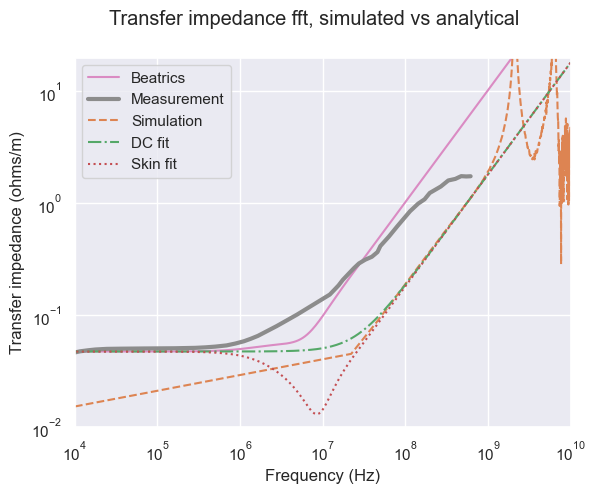

In [540]:
### Create Zt plot ###
zfreq = ifreq

zfreq[0] = 1e3  # makes nicer plots at low freqency resolutions
sns.set()
#plt.loglog(f_Tyni, np.abs(zt_Tyni), linestyle='-', color='C0', label='Tyni')
#plt.loglog(f_Vance, np.abs(zt_Vance), linestyle='-', color='C5', label='Vance')
plt.plot(f_Bea, np.abs(zt_Bea), linestyle='-', color='C6', label='Beatrics')

if measurement != None:
    f_measure, zt_measure = np.loadtxt(measurement).T
    plt.plot(f_measure, zt_measure, color='C7', linestyle='-', linewidth=3, label='Measurement')

if plotstyle == 'line':
    plt.plot(zfreq, zt_mag, linestyle='--', color='C1', label='Simulation')
elif plotstyle == 'points':
    points = [zt_mag[np.argmin(np.abs(zfreq - sample_freq))] for sample_freq in sample_freqs]
    plt.scatter(sample_freqs, points, color='C1', label='Simulation')
    print('Plotting ', points)
    
plt.plot(fit_freq, zt_fit, linestyle='-.', color='C2', label='DC fit')
plt.plot(skin_freq, zt_skin, linestyle=':', color='C3', label='Skin fit')
plt.xlim(1e4, 1e10)
plt.ylim(1e-2, 2e1)
plt.suptitle('Transfer impedance fft, simulated vs analytical')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transfer impedance (ohms/m)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

Text(0.5, 0.98, 'Transfer impedance phase')

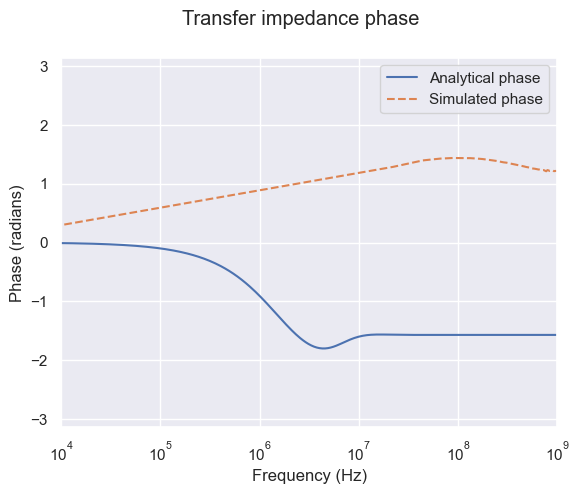

In [541]:
plt.semilogx(f_Tyni, np.angle(zt_Bea), label='Analytical phase')

if plotstyle == 'points':
    points = [zt_phase[np.argmin(np.abs(zfreq - sample_freq))] for sample_freq in sample_freqs]
    plt.scatter(sample_freqs, points, color='C1', label='Simulated phase')
    
elif plotstyle == 'line':
    plt.semilogx(zfreq, zt_phase, color='C1', label='Simulated phase', linestyle='--')
    
plt.legend()
plt.ylim(-np.pi, np.pi)
plt.xlim(1e4, 1e9)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.suptitle('Transfer impedance phase')

In [542]:
index = np.abs(zfreq - 3e9).argmin()
np.argmin(zt_phase[:index])
zfreq[98]

2172611693.4107847

In [543]:
# Plot error relative to analytical
Vance_errors = []
Tyni_errors = []
Bea_errors = []
measure_errors = []

for n, f in enumerate(skin_freq):
    arg = np.argmin(np.abs(f_Tyni - f))
    sim = zt_skin[n]
    val_Vance = np.abs(zt_Vance[arg])
    val_Tyni = np.abs(zt_Tyni[arg])
    val_Bea = np.abs(zt_Bea[arg])
    
    Vance_errors.append((sim - val_Vance) / val_Vance)
    Tyni_errors.append((sim - val_Tyni) / val_Tyni)
    Bea_errors.append((sim - val_Bea)  / val_Bea)
    

if measurement != None:
    for n, f in enumerate(f_measure):
        arg = np.argmin(np.abs(skin_freq - f))
        sim = zt_skin[arg]
        val_measure = zt_measure[n]
        measure_errors.append((sim - val_measure) / val_measure)

Text(0.5, 0.98, 'Transfer impedance percent error')

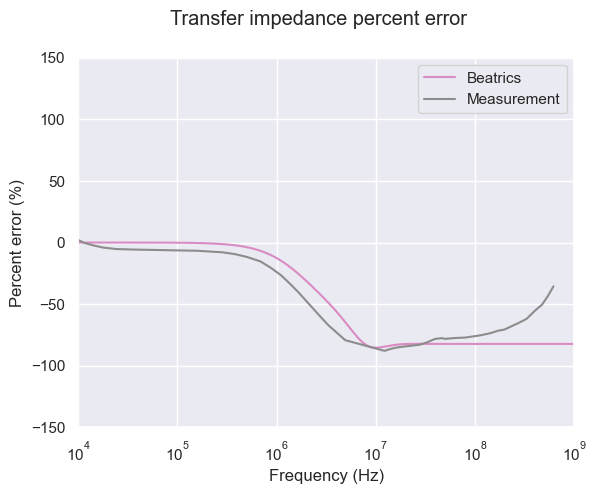

In [544]:
#plt.semilogx(skin_freq, np.array(Tyni_errors)*100, color='C0', label='Tyni')
#plt.semilogx(skin_freq, np.array(Vance_errors)*100, color='C5', label='Vance')
plt.semilogx(skin_freq, np.array(Bea_errors)*100, color='C6', label='Beatrics')

if measurement != None:
    plt.semilogx(f_measure, np.array(measure_errors)*100, color='C7', label='Measurement')
    
plt.legend()
plt.xlim(1e4, 1e9)
plt.ylim(-150, 150)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent error (%)')
plt.suptitle('Transfer impedance percent error')

In [545]:
tyni_index = np.argmin(np.abs(freq - np.array(f_Tyni)))
zt_Tyni[tyni_index]

(0.047496397087335204-3.641588151536887e-05j)

In [546]:
v0 = v_fft[index]
print(v0)

(2.5279407664032827e-05+7.350112435917908e-05j)


In [514]:
i0 = i_fft[index]
print(i0)

(-0.0017108886489192383+0.004078053404046851j)


In [515]:
dvdx = v0 / dx
print(dvdx)
print(dx)

(0.0027233666430311844-0.005034355431851488j)
0.0352


In [516]:
##### ZT OUTPUT #####
zt = dvdx / i0
zt_analytical = zt_Tyni[np.argmin(np.abs(np.array(f_Tyni) - freq))]
error = (zt - zt_analytical) / zt_analytical
print(f'Zt simualted: {round(zt, 6)}\nZt analytical: {round(zt_analytical, 6)}\nError: {round(100*error, 1)}%')

Zt simualted: (-1.287974-0.12746j)
Zt analytical: (0.047496-3.6e-05j)
Error: (-2811.5-270.4j)%


C:\Users\griffin.kowash\AppData\Local\Temp\ipykernel_22616\1915796759.py:5: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print(f'Zt simualted: {round(zt, 6)}\nZt analytical: {round(zt_analytical, 6)}\nError: {round(100*error, 1)}%')


Text(0.5, 0.98, 'Wire current (time series)')

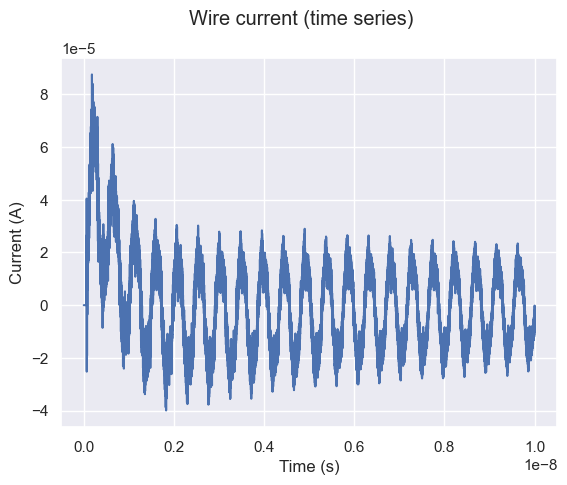

In [517]:
plt.plot(iwiret, iwire)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.suptitle('Wire current (time series)')

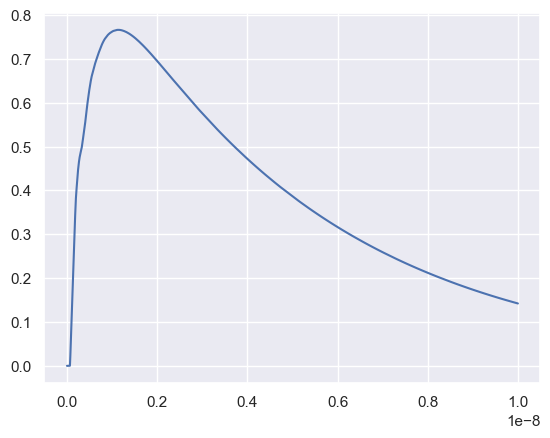

In [518]:
plt.plot(ibulkt, ibulk)

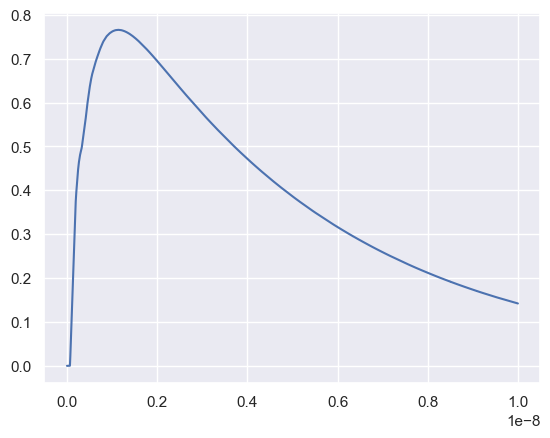

In [519]:
plt.plot(it, i)